<a href="https://colab.research.google.com/github/realsanjeev/Image-generation-using-DCGAN/blob/main/stable_diffusion_xl_base_1_0_(text_to_image).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Feb 25 06:55:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### **Diffusers**  
[Diffusers](https://pypi.org/project/diffusers/) is the go-to library for state-of-the-art pretrained diffusion models, enabling image, audio, and even 3D molecular structure generation. Whether you're running inference or training your own diffusion models, 🤗 Diffusers provides a modular and flexible toolbox to support both.  

Main features:  
- **Prebuilt diffusion pipelines** for easy inference with minimal code.  
- **Interchangeable noise schedulers** to balance diffusion speed and output quality.  
- **Pretrained models** that can be combined with schedulers to create custom end-to-end diffusion systems.  

### **Invisible Watermark**  
[Invisible Watermark](https://pypi.org/project/invisible-watermark/) is a tool for embedding invisible (blink/digital) watermarks into images. Unlike traditional watermarking methods, this algorithm does not require the original image for watermark extraction.  

### **Transformers**  
[Transformers](https://pypi.org/project/transformers/) is a library by Hugging Face that provides state-of-the-art pretrained transformer models for natural language processing, computer vision, and beyond.  

### **Accelerate**  
[Accelerate](https://github.com/huggingface/accelerate) simplifies the process of running PyTorch models on multiple GPUs, TPUs, or distributed environments with minimal code changes. It’s designed to optimize training performance across different hardware setups.  

### **Safetensors**  
[Safetensors](https://github.com/huggingface/safetensors) is a safe and efficient tensor storage format designed to prevent malicious modifications and improve loading speed over traditional PyTorch `.pt` files.

#### References:
- [diffusers on PyPI](https://pypi.org/project/diffusers/)
- [invisible_watermark on PyPI](https://pypi.org/project/invisible-watermark/)
- [transformers on PyPI](https://pypi.org/project/transformers/)
- [accelerate GitHub Repository](https://github.com/huggingface/accelerate)
- [safetensors on GitHub](https://github.com/huggingface/safetensors)

In [2]:
!pip install diffusers --upgrade -q
!pip install invisible_watermark transformers accelerate safetensors -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.8 MB/s eta 0:00:00


In [3]:
import torch
from diffusers import DiffusionPipeline

from matplotlib import pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Diffusion model from `stability.ai`
The `DiffusionPipeline` is used for running inference on the Diffusion models, which are powerful generative models designed for image synthesis and related tasks.

### Initializing the pipeline with several options:

1. `from_pretrained`: This method is used to load the pre-trained model specified by the provided model identifier (in this case, "stabilityai/stable-diffusion-xl-refiner-1.0").

2. `torch_dtype`: This parameter specifies the torch datatype to be used during inference. In this case, it is set to `torch.float16`, which represents 16-bit floating-point numbers (half precision). This can be used to reduce memory usage and speed up computations, but it may cause a slight loss in precision compared to `torch.float32` (32-bit floating-point numbers).

3. `use_safetensors`: This parameter is used to enable the use of "SafeTensors" in the pipeline. SafeTensors help mitigate NaN/Inf issues in gradient-based optimization and can be helpful when dealing with difficult gradient landscapes.

4. `variant`: This parameter specifies the variant of the model to be used. In this case, it is set to "fp16", which likely indicates that the model variant uses 16-bit floating-point precision (float16) for better memory and speed performance.

#### References:
- [stable-diffusion-xl-base-1.0 Hugging Face](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0)
- [SDEdit: Guided Image Synthesis and Editing with Stochastic Differential Equations - Paper](https://arxiv.org/abs/2108.01073)


In [5]:
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",
                                         torch_dtype=torch.float16,
                                         use_safetensors=True,
                                         variant="fp16")
pipe.to("cuda")

prompt = "A man running after iron man with batman on his back and joker in his hand"

images = pipe(prompt=prompt).images[0]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2%2Fconfig.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2%2Ftokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

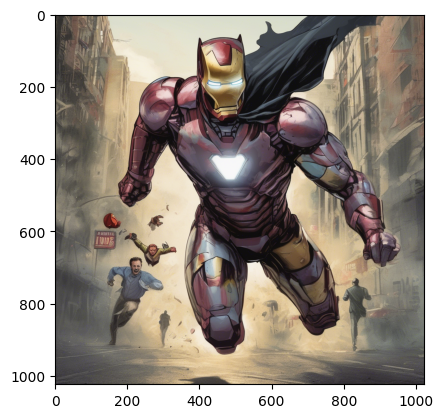

In [6]:
plt.imshow(images)

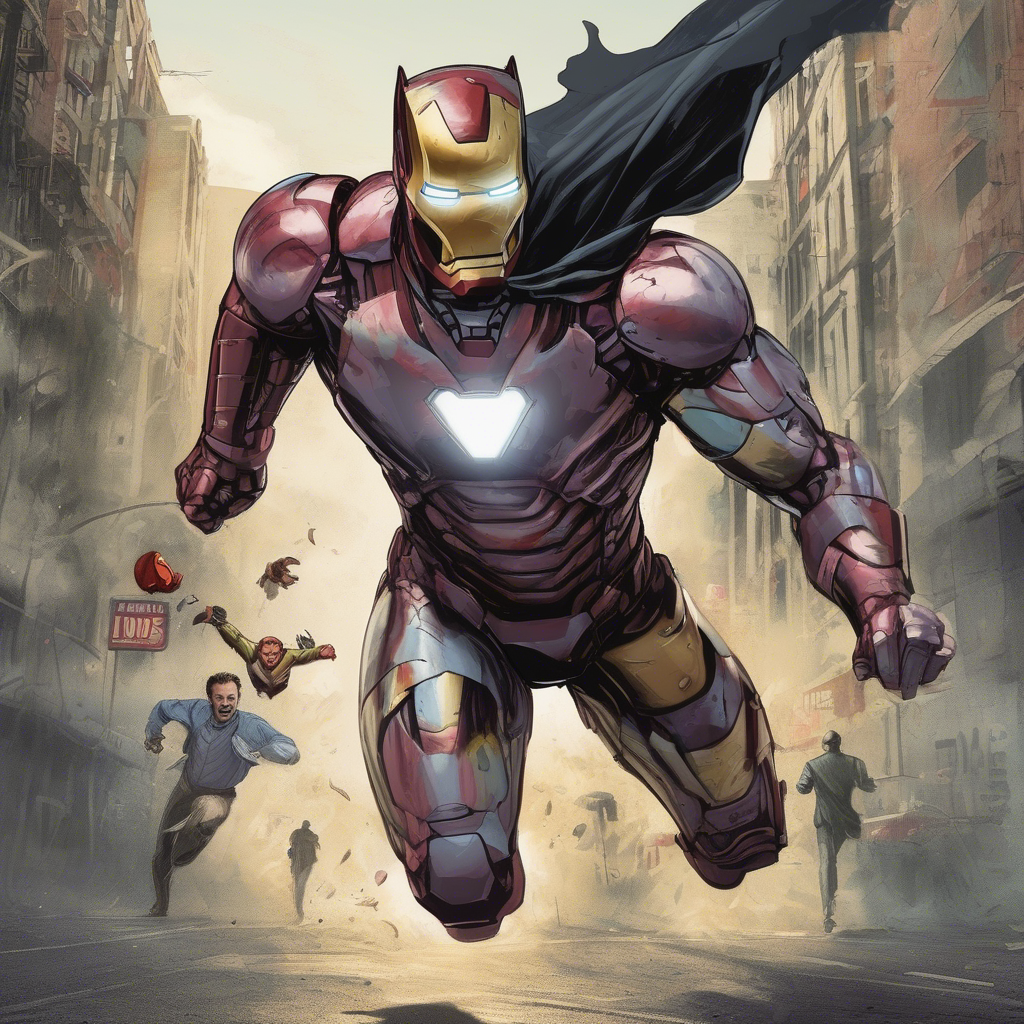

In [7]:
images

In [8]:
prompt = "A man sitting in sun eating corn"

predict_images = pipe(prompt=prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

In [9]:
predict_images

StableDiffusionXLPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7E30C09F4610>])

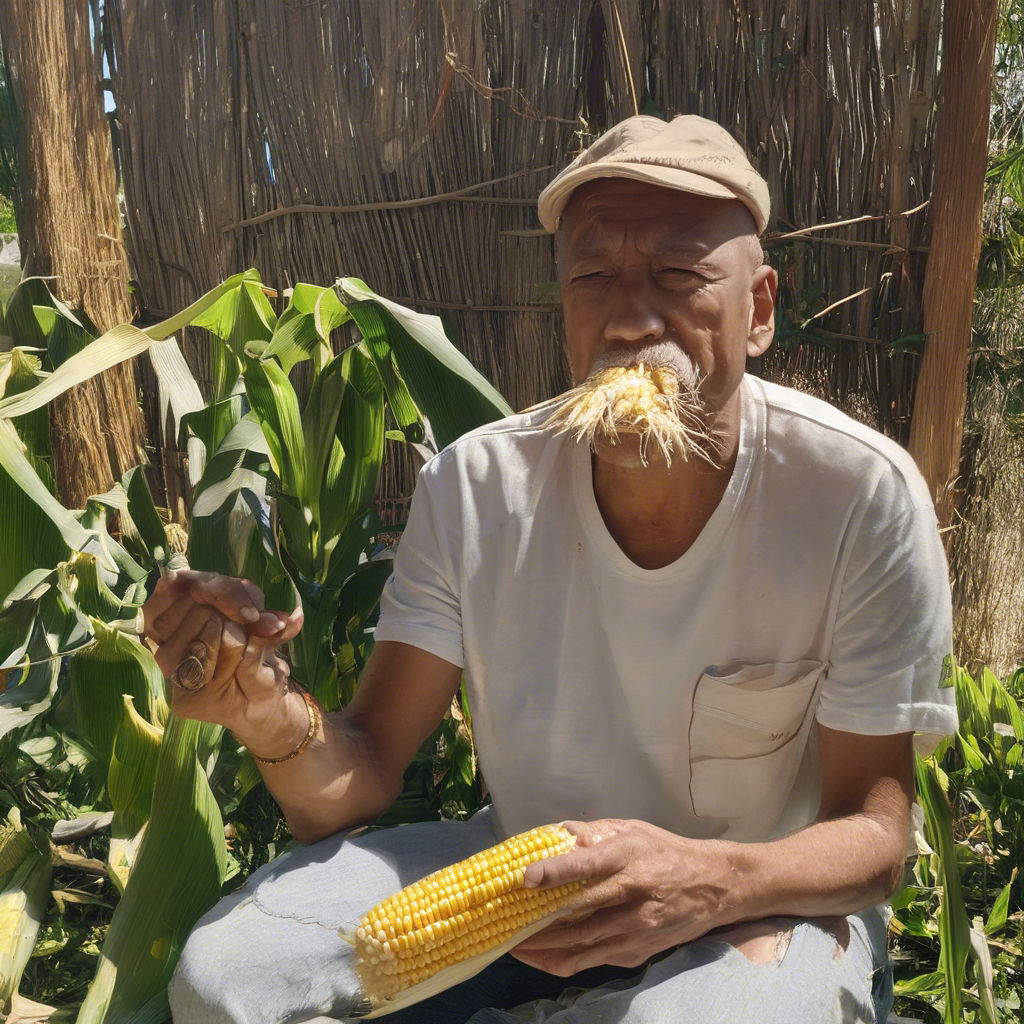

In [10]:
predict_images.images[0]